In [1]:
# Si Mai
# HW 1 Problem 4
# Declarations
import numpy as np
from numpy import nan as Nan
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# Dataframes for FAH for respective interals
file = '../USFoodCommodity.xls'
data = pd.ExcelFile(file)
Sheet_94_98 = data.parse('94-98 FAH', skiprows=73, skip_footer=142, index_col=0)
Sheet_07_08 = data.parse('07-08 FAH', skiprows=73, skip_footer=142, index_col=0)

fruits = ['Apples as fruit', 'Bananas', 'Berries', 'Grapes', 'Melons', 'Oranges, Total', 'Other citrus fruit', 'Stone fruit', 'Tropical fruit']
dairy = ['Fluid milk, Total', 'Butter', 'Cheese', 'Yogurt', 'Dairy, Other']

# Trimming rows and columns with NaNs
FAH_94_98_Men = Sheet_94_98.dropna(how='all', axis='columns')
FAH_94_98_Men = FAH_94_98_Men.dropna(how='any')

FAH_07_08_Men = Sheet_07_08.dropna(how='all', axis='columns')
FAH_07_08_Men = FAH_07_08_Men.dropna(how='any')

FAH_94_98_Women = Sheet_94_98.dropna(how='all', axis='columns')
FAH_94_98_Women = FAH_94_98_Women.dropna(how='any')

FAH_07_08_Women = Sheet_07_08.dropna(how='all', axis='columns')
FAH_07_08_Women = FAH_07_08_Women.dropna(how='any')

# DataFrame - Fruit types over time (men)
FAH_94_98_Men_Fruit = FAH_94_98_Men.iloc[:, [6]]
FAH_94_98_Men_Fruit.index = FAH_94_98_Men_Fruit.index.str.strip()
FAH_94_98_Men_Fruit = FAH_94_98_Men_Fruit.loc[fruits, :]

FAH_07_08_Men_Fruit = FAH_07_08_Men.iloc[:, [6]]
FAH_07_08_Men_Fruit.index = FAH_07_08_Men_Fruit.index.str.strip()
FAH_07_08_Men_Fruit = FAH_07_08_Men_Fruit.loc[fruits, :]

# DataFrame - Fruit types over time (women)
FAH_94_98_Women_Fruit = FAH_94_98_Women.iloc[:, [9]]
FAH_94_98_Women_Fruit.index = FAH_94_98_Women.index.str.strip()
FAH_94_98_Women_Fruit = FAH_94_98_Women_Fruit.loc[fruits, :]

FAH_07_08_Women_Fruit = FAH_07_08_Women.iloc[:, [9]]
FAH_07_08_Women_Fruit.index = FAH_07_08_Women_Fruit.index.str.strip()
FAH_07_08_Women_Fruit = FAH_07_08_Women_Fruit.loc[fruits, :]

# DataFrame - Dairy types over time (men)
FAH_94_98_Men_Dairy = FAH_94_98_Men.iloc[:, [6]]
FAH_94_98_Men_Dairy.index = FAH_94_98_Men_Dairy.index.str.strip()
FAH_94_98_Men_Dairy = FAH_94_98_Men_Dairy.loc[dairy, :]

FAH_07_08_Men_Dairy = FAH_07_08_Men.iloc[:, [6]]
FAH_07_08_Men_Dairy.index = FAH_07_08_Men_Dairy.index.str.strip()
FAH_07_08_Men_Dairy = FAH_07_08_Men_Dairy.loc[dairy, :]

# DataFrame - Dairy types over time (women)
FAH_94_98_Women_Dairy = FAH_94_98_Women.iloc[:, [9]]
FAH_94_98_Women_Dairy.index = FAH_94_98_Women_Dairy.index.str.strip()
FAH_94_98_Women_Dairy = FAH_94_98_Women_Dairy.loc[dairy, :]

FAH_07_08_Women_Dairy = FAH_07_08_Women.iloc[:, [9]]
FAH_07_08_Women_Dairy.index = FAH_07_08_Women_Dairy.index.str.strip()
FAH_07_08_Women_Dairy = FAH_07_08_Women_Dairy.loc[dairy, :]

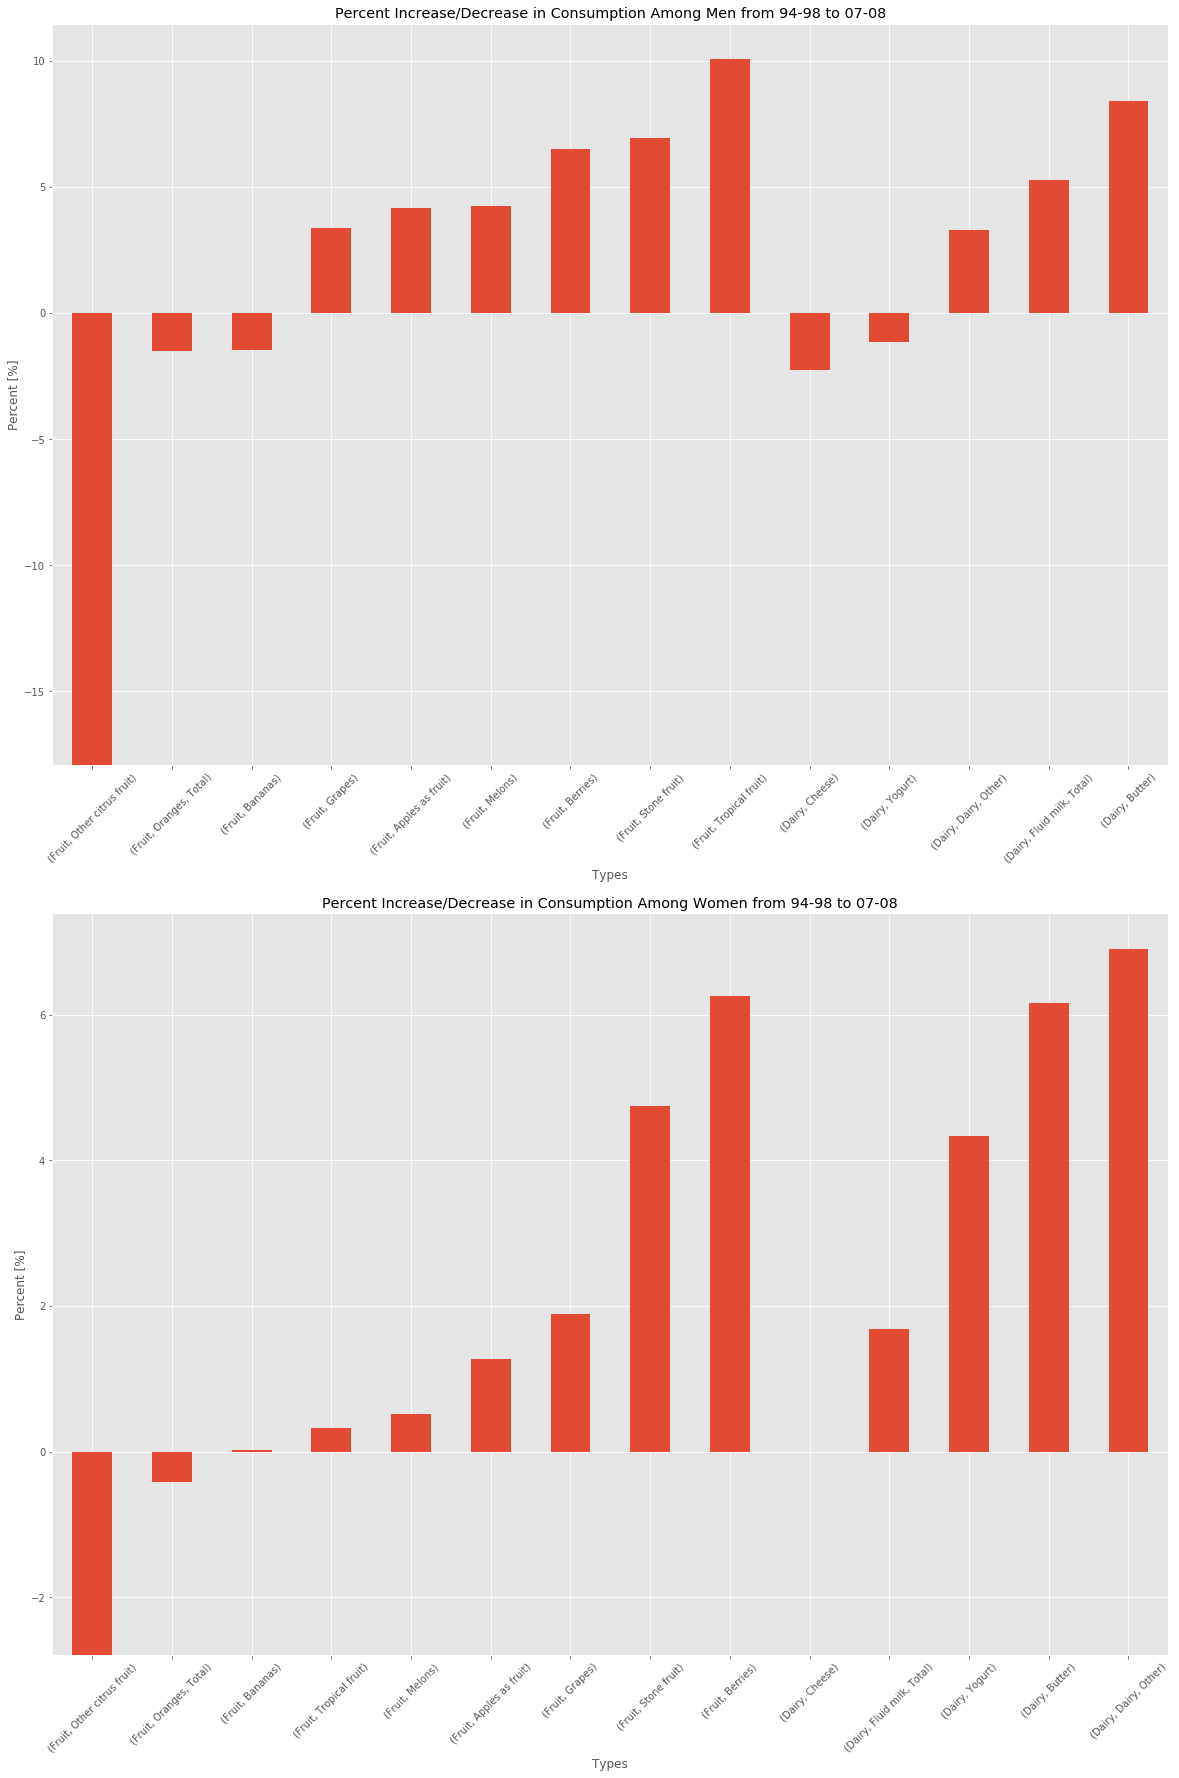

In [57]:
Men_Fruit_Diff = FAH_07_08_Men_Fruit - FAH_94_98_Men_Fruit
Men_Dairy_Diff = FAH_07_08_Men_Dairy - FAH_94_98_Men_Dairy

Men_Fruit_Diff.columns = Men_Dairy_Diff.columns = ['Difference']

Men_Fruit_Diff['Type'] = 'Fruit'
Men_Dairy_Diff['Type'] = 'Dairy'

Men_Fruit_Diff = Men_Fruit_Diff.set_index(['Type', Men_Fruit_Diff.index])
Men_Fruit_Diff = Men_Fruit_Diff.sort_values(['Difference'])

Men_Dairy_Diff = Men_Dairy_Diff.set_index(['Type', Men_Dairy_Diff.index])
Men_Dairy_Diff = Men_Dairy_Diff.sort_values(['Difference'])

Men = Men_Fruit_Diff.append(Men_Dairy_Diff)

Women_Fruit_Diff = FAH_07_08_Women_Fruit - FAH_94_98_Women_Fruit
Women_Dairy_Diff = FAH_07_08_Women_Dairy - FAH_94_98_Women_Dairy

Women_Fruit_Diff.columns = Women_Dairy_Diff.columns = ['Difference']

Women_Fruit_Diff['Type'] = 'Fruit'
Women_Dairy_Diff['Type'] = 'Dairy'

Women_Fruit_Diff = Women_Fruit_Diff.sort_values(['Difference'])
Women_Dairy_Diff = Women_Dairy_Diff.sort_values(['Difference'])

Women = Women_Fruit_Diff.append(Women_Dairy_Diff)
Women = Women.set_index(['Type', Women.index])


fig, axes = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(20,30)

m = Men.plot(ax = axes[0], kind='bar', rot=45, legend=False)
#m.set_xticklabels(Men.index.levels[1])
m.set_xlabel('Types')
m.set_ylabel('Percent [%]')
m.set_title('Percent Increase/Decrease in Consumption Among Men from 94-98 to 07-08')

w = Women.plot(ax = axes[1], kind='bar', rot=45, legend=False)
#w.set_xticklabels(Women.index.levels[1])
w.set_xlabel('Types')
w.set_ylabel('Percent [%]')
w.set_title('Percent Increase/Decrease in Consumption Among Women from 94-98 to 07-08')